## Network Analysis
### 1.1 Centrality Measures
Select 3 centrality measures to characterise nodes, aiming at identifying the most important nodes in 
the underground network. Give the definition of each of the measures (including their equation), put 
the measures into the context of the underground, and why they will allow you to find the stations that 
are most crucial for the functioning of the underground. Compute the measures for your nodes in the 
network, and give the results in a table for the first 10 ranked nodes for each of the 3 measures.  

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from operator import itemgetter

1.1.1 Read the data, and explore the network:


In [16]:
# make multiple copies of the graph
london_graph = nx.read_graphml('london_tubenetwork.graphml')
london_graph2 = nx.read_graphml('london_tubenetwork.graphml')
london_graph3 = nx.read_graphml('london_tubenetwork.graphml')

In [17]:
# add the stations name to the edge attributes from the nodes attributes:
nod_name1={(e1,e2):(london_graph.nodes[e1]['station_name']) for e1, e2 in london_graph.edges()}
nod_name2={(e1,e2):(london_graph.nodes[e2]['station_name']) for e1, e2 in london_graph.edges()}

nx.set_edge_attributes(london_graph,nod_name1,'station_1_')
nx.set_edge_attributes(london_graph,nod_name2,'station_2_')

In [18]:
print(len(dir(london_graph)))
for i in np.random.randint(0, len(dir(london_graph)), 10):
    print(dir(london_graph)[i])

75
order
name
__gt__
__dir__
subgraph
to_undirected
add_nodes_from
node_dict_factory
nodes
__init_subclass__


In [19]:
print(london_graph.number_of_nodes())
print(london_graph.number_of_edges())

438
486


In [23]:
# To check node attributes:
list(london_graph.nodes(data = True))[0]

('910GCAMHTH',
 {'station_name': 'Cambridge Heath',
  'lines': 'London Overground',
  'coords': (534825.0140298002, 183290.813466997)})

In [21]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in london_graph.nodes():
    london_graph.nodes[node]['coords'] = eval(london_graph.nodes[node]['coords'])
    

In [22]:
# To check edges attributes:
list(london_graph.edges(data = True))[0]

('910GCAMHTH',
 '910GBTHNLGR',
 {'length': 1076.0822006959384,
  'name': 'London Overground',
  'line_id': 'LeaValleyLine1',
  'station_1_': 'Cambridge Heath',
  'station_2_': 'Bethnal Green'})

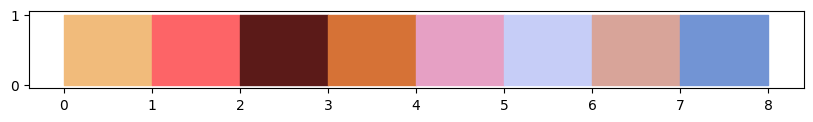

In [24]:
# Now import my favourite colour palette:
grandBudapest_colors = ["#F1BB7B", "#FD6467", "#5B1A18", "#D67236", "#E6A0C4", "#C6CDF7", "#D8A499", "#7294D4"]

# Now let's plot color pallette
plt.figure(figsize=(10, 1))
for i, color in enumerate(grandBudapest_colors):
    plt.fill_between([i, i + 1], 0, 1, color=color)


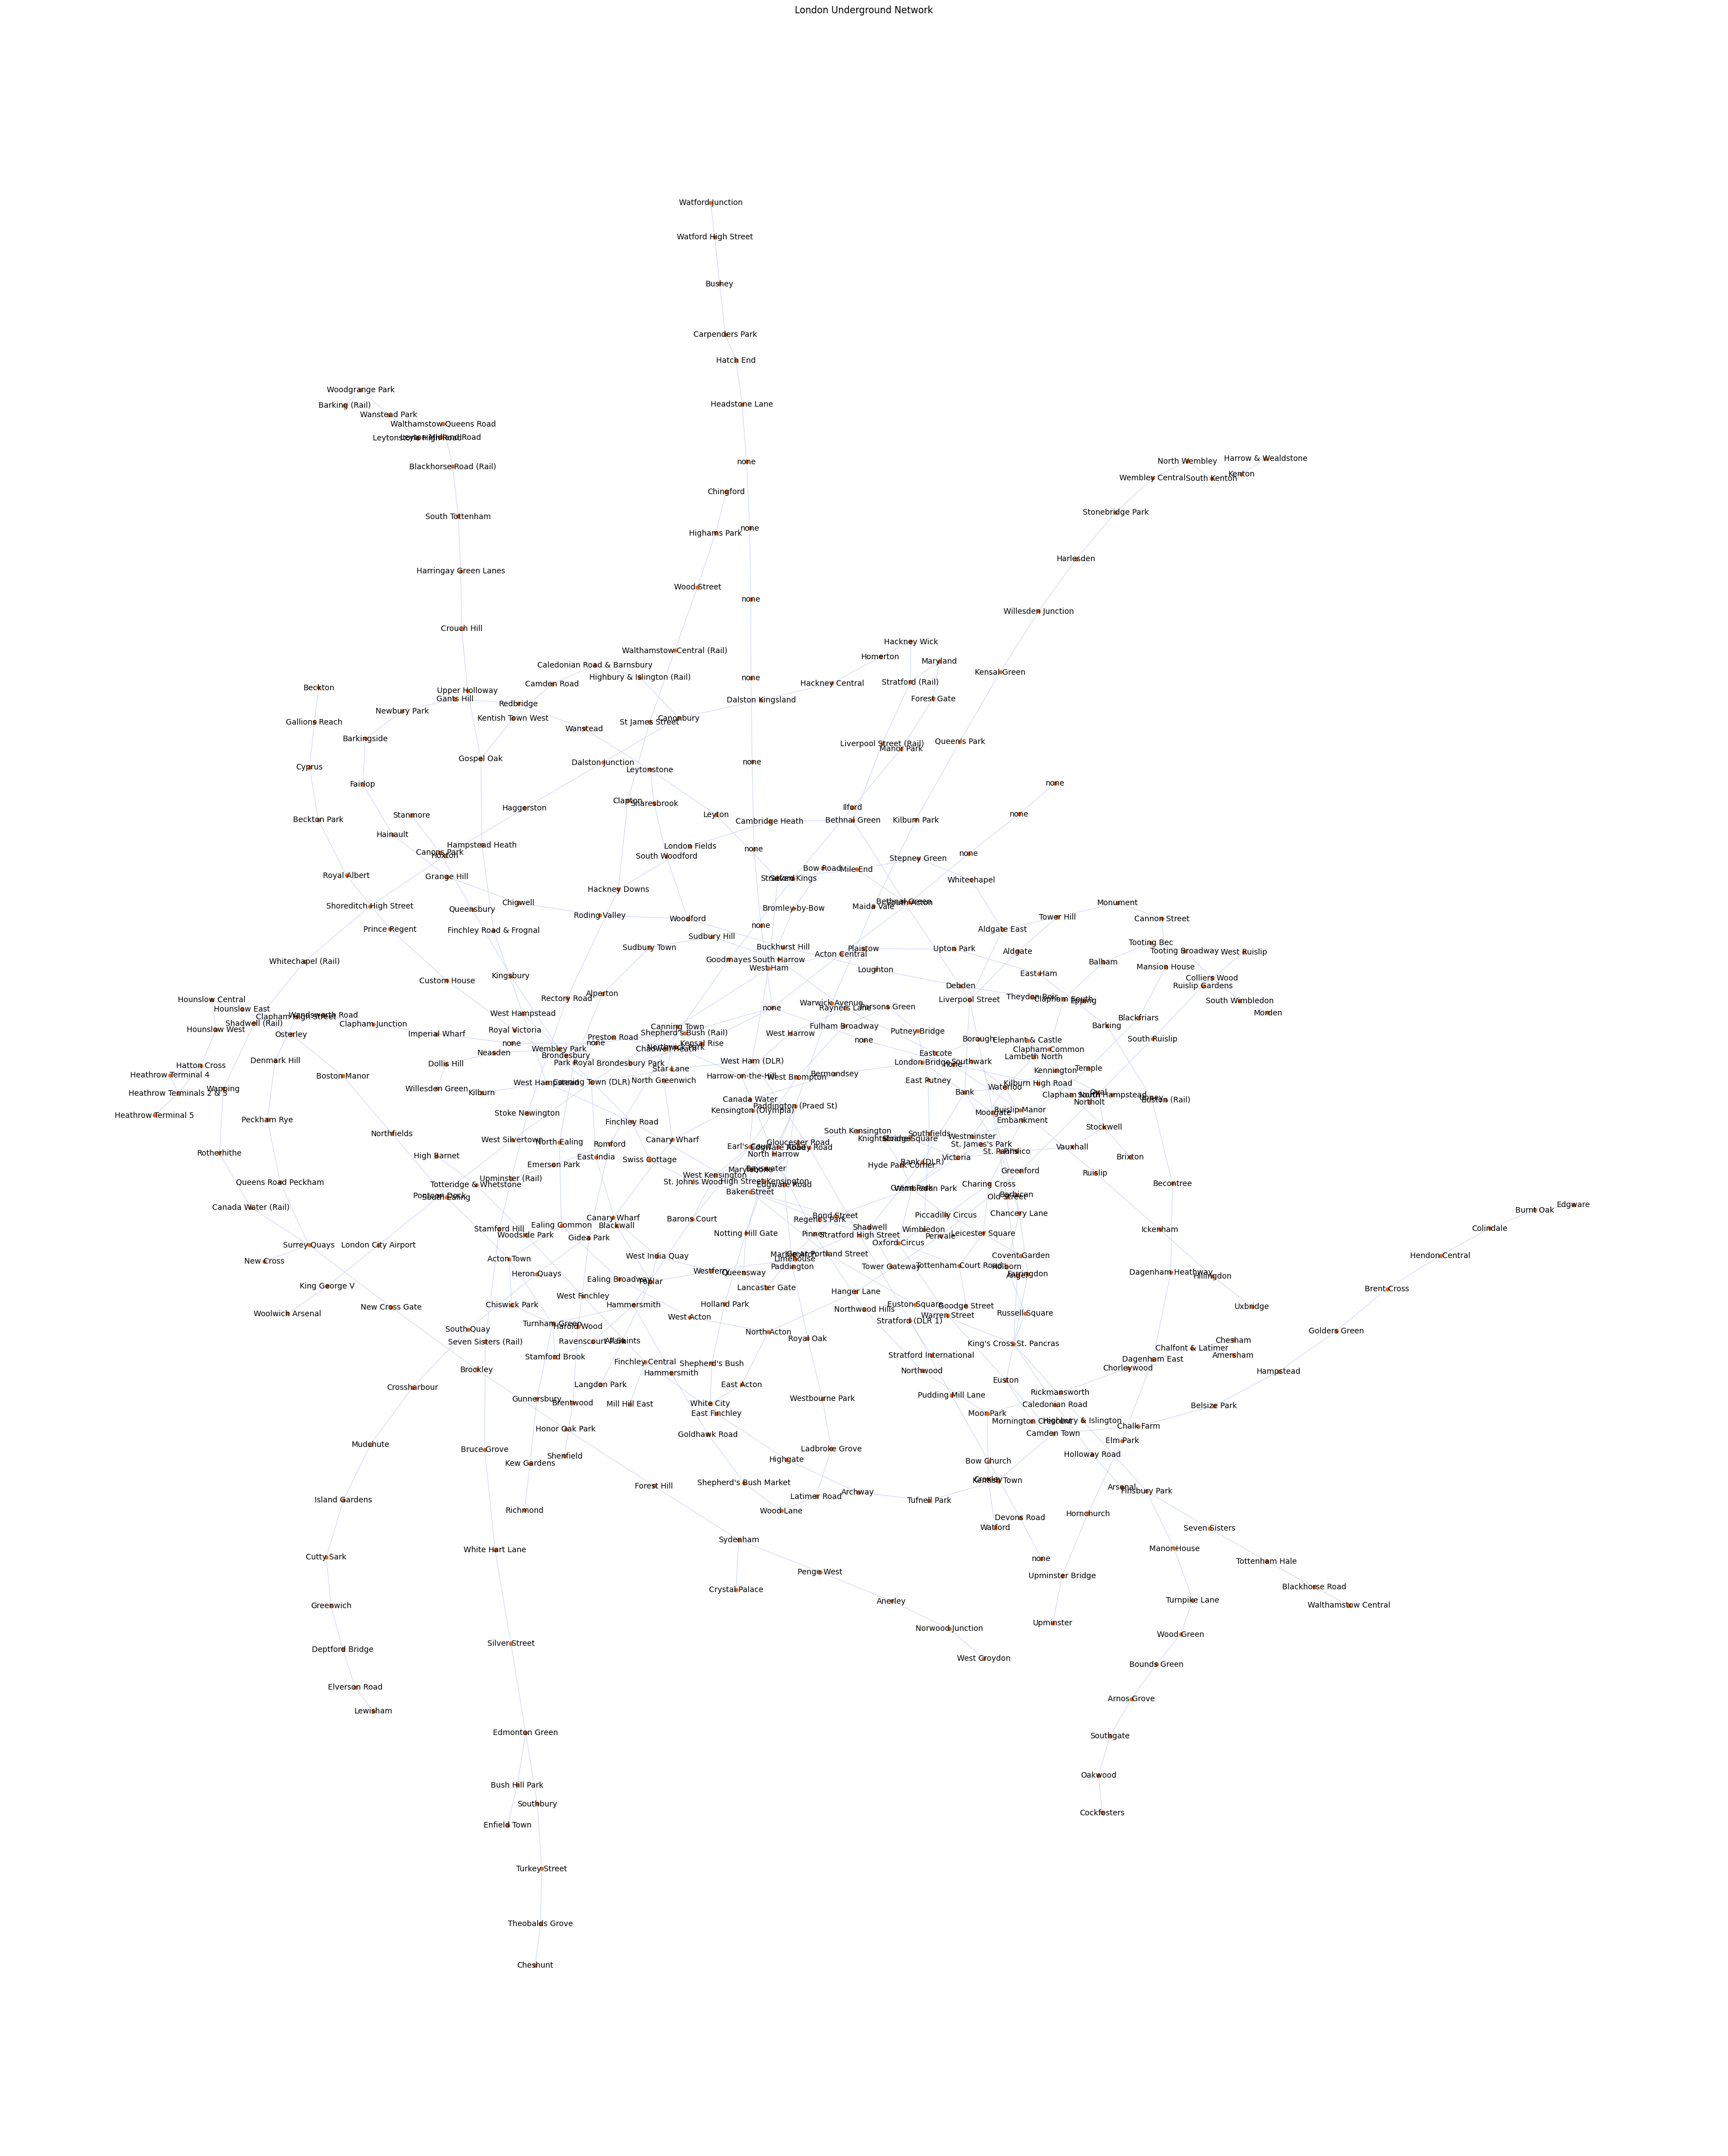

In [25]:
# Draw the network
plt.figure(figsize=(40, 50))
node_labels = nx.get_node_attributes(london_graph, 'station_name')

pos = nx.spring_layout(london_graph, seed=42)  # For consistent layout
nx.draw_networkx_nodes(london_graph, pos, node_size= 20, node_color = grandBudapest_colors[3])
nx.draw_networkx_edges(london_graph, pos, alpha=0.8, edge_color=grandBudapest_colors[5], 
        width=0.8)
# Draw node labels
nx.draw_networkx_labels(london_graph, pos, node_labels, font_size=10, font_color='black')
plt.title("London Underground Network")
plt.axis('off')  # Turn off the axis
plt.show()


In [26]:
 #We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(london_graph)
df[0:20]

,source,target,station_2_,station_1_,length,line_id,name
0,910GCAMHTH,910GBTHNLGR,Bethnal Green,Cambridge Heath,1076.082201,LeaValleyLine1,London Overground
1,910GCAMHTH,910GLONFLDS,London Fields,Cambridge Heath,970.949720,LeaValleyLine2,London Overground
2,910GBTHNLGR,910GLIVST,Liverpool Street (Rail),Bethnal Green,1813.304143,LivStBeth,London Overground
3,910GBTHNLGR,940GZZLUBLG,Bethnal Green,Bethnal Green,481.514661,NaN,NaN
4,910GLONFLDS,910GHAKNYNM,Hackney Downs,London Fields,917.502798,LeaValleyLine3,London Overground
5,910GHAKNYNM,910GRCTRYRD,Rectory Road,Hackney Downs,1178.231752,LeaValleyLine4,London Overground
6,910GHAKNYNM,910GCLAPTON,Clapton,Hackney Downs,1432.298268,ChingfordSpur1,London Overground
7,910GRCTRYRD,910GSTKNWNG,Stoke Newington,Rectory Road,775.442407,LeaValleyLine5,London Overground
8,910GSTKNWNG,910GSTMFDHL,Stamford Hill,Stoke Newington,1200.722885,LeaValleyLine6,London Overground
9,910GSTMFDHL,910GSEVNSIS,Seven Sisters (Rail),Stamford Hill,1001.203674,LeaValleyLine7,London Overground


In [52]:
#if want to know what is the maximum distance between stations
max_dist=max({weight for e1, e2, weight in london_graph.edges(data='length')})

#This distance in given in meters
#if want to know the name of stations which are further away from each other
furthest_stat = [(d['station_1_'],d['station_2_']) for  u,v,d in london_graph.edges(data=True) if d['length'] == max_dist]

#if want to know to which stations Baker Street is directly connected to
Baker_Street = [(d['station_1_'],d['station_2_']) for  u,v,d in london_graph.edges(data=True) if d['station_1_'] == 'Baker Street'or d['station_2_'] == 'Baker Street']
(max_dist,furthest_stat,Baker_Street)

(7113.318903338077,
 [('Wembley Park', 'Finchley Road')],
 [('Edgware Road', 'Baker Street'),
  ('Baker Street', 'Great Portland Street'),
  ('Baker Street', 'Bond Street'),
  ('Baker Street', "St. John's Wood"),
  ('Baker Street', 'Finchley Road'),
  ('Baker Street', 'Marylebone'),
  ('Baker Street', "Regent's Park")])

1.1.2 Centrality Measures
1) Degree Centrality

In [27]:
degree_centrality = nx.degree_centrality(london_graph)
nx.set_node_attributes(london_graph,dict(degree_centrality),'degree')
# To dataframe using the nodes as the index
df = pd.DataFrame(index=london_graph.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(london_graph, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(london_graph, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,station_name,degree
940GZZLUKSX,King's Cross St. Pancras,0.016018
940GZZLUBST,Baker Street,0.016018
940GZZLUOXC,Oxford Circus,0.013730
940GZZLUGPK,Green Park,0.013730
940GZZLUBNK,Bank,0.013730
940GZZLUECT,Earl's Court,0.013730
940GZZLUWLO,Waterloo,0.013730
940GZZLUTNG,Turnham Green,0.011442
940GZZDLCGT,Canning Town (DLR),0.011442
940GZZLULVT,Liverpool Street,0.011442


In [28]:
df_sorted[0:20]

,station_name,degree
940GZZLUKSX,King's Cross St. Pancras,0.016018
940GZZLUBST,Baker Street,0.016018
940GZZLUOXC,Oxford Circus,0.013730
940GZZLUGPK,Green Park,0.013730
940GZZLUBNK,Bank,0.013730
940GZZLUECT,Earl's Court,0.013730
940GZZLUWLO,Waterloo,0.013730
940GZZLUTNG,Turnham Green,0.011442
940GZZDLCGT,Canning Town (DLR),0.011442
940GZZLULVT,Liverpool Street,0.011442


2) Betweeness centrality


In [8]:
# Recompute the centrality measures

betweenness_centrality = nx.betweenness_centrality(london_graph)
closeness_centrality = nx.closeness_centrality(london_graph)

# Sort and get the top 10 nodes for each centrality measure
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

#

#(sorted_degree, sorted_betweenness, sorted_closeness)


In [12]:
london_graph

In [9]:
pd.DataFrame.from_dict(sorted_degree,columns=['degree centrality'],orient='index')
pd.DataFrame.from_dict(sorted_betweenness,columns=['betweeness centrality'],orient='index')
pd.DataFrame.from_dict(sorted_closeness,columns=['closeness centrality'],orient='index')

AttributeError: 'list' object has no attribute 'values'

Delta Centrality

In [ ]:
# Compute initial betweenness centrality
initial_betweenness = nx.betweenness_centrality(G)

# Initialize a dictionary to store delta centrality
delta_centrality = {}

# Iterate over all nodes to compute delta centrality
for node in G.nodes():
    # Create a copy of the graph without the current node
    G_copy = copy.deepcopy(G)
    G_copy.remove_node(node)
    
    # Recompute betweenness centrality without the node
    new_betweenness = nx.betweenness_centrality(G_copy)
    
    # Calculate the difference and store it
    delta_centrality[node] = sum(abs(initial_betweenness[n] - new_betweenness.get(n, 0)) for n in initial_betweenness)

# Sort nodes by their delta centrality
sorted_delta_centrality = sorted(delta_centrality.items(), key=lambda x: x[1], reverse=True)

Delta centrality

In [ ]:
import networkx as nx
import copy

# Load your network
G = nx.read_graphml('path_to_your_graphml_file.graphml')

# Compute initial betweenness centrality
initial_betweenness = nx.betweenness_centrality(G)

# Initialize a dictionary to store delta centrality
delta_centrality = {}

# Iterate over all nodes to compute delta centrality
for node in G.nodes():
    # Create a copy of the graph without the current node
    G_copy = copy.deepcopy(G)
    G_copy.remove_node(node)
    
    # Recompute betweenness centrality without the node
    new_betweenness = nx.betweenness_centrality(G_copy)
    
    # Calculate the difference and store it
    delta_centrality[node] = sum(abs(initial_betweenness[n] - new_betweenness.get(n, 0)) for n in initial_betweenness)

# Sort nodes by their delta centrality
sorted_delta_centrality = sorted(delta_centrality.items(), key=lambda x: x[1], reverse=True)


Find 2 different measures to evaluate the impact of the node removal on the network. These need to 
be global measures referring to the whole network and not to specific nodes or links. Explain whether 
these two measures are specific to the London underground, or whether they could also be used to 
evaluate the resilience of any other network.  

For each of the centrality measures selected in I.1. remove at least 10 nodes following two different 
strategies. A) Non-sequential removal: using the table created in I.1. remove 1 node at a time 
following the rank in the table, i.e. from the most important one to the 10

th most important one. After 
each removal, evaluate the impact of the removal using your two measures in I.2. and proceed until 
you have removed at least 10 nodes. B) Sequential: remove the highest ranked node and evaluate the 
impact using the 2 measures. After removal, re-compute the centrality measure. Remove the highest 
ranked node in the new network and evaluate the impact. Continue until removing at least 10 nodes. 

Report the results of the 2 strategies in one plot, and critically discuss the following: which centrality 
measure reflects better the importance of a station for the functioning of the underground, which 
strategy is more effective at studying resilience, and which impact measure is better at assessing the 
damage after node removal.  